# Nombre cool del proyecto :3

**Integrantes:**
- Valeria Huepa Ducuara
- Liseth Yurany Arevalo Yaruro
- Guiselle Tatiana Zambrano Penagos

In [1]:
# Librerías requerídas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing

##  Comprensión del Negocio

## Comprensión de los Datos

En primer lugar se buscará entender la información que otorga cada una de las variables presentes en el dataset, posteriormente visualizar información más detallada de las columnas y la relación entre las mismas, para finalmente iniciar la siguiente fase, la cual es la preparación de los datos.

A continuación leemos los datos del archivo `googleplaystore.csv` y lo almacenamos como un dataframe en la variable `df`.
Posteriormente mostramos las primeras 5 filas para tener una idea general de los datos que observamos.

In [2]:
df = pd.read_csv('data/googleplaystore.csv', encoding='utf8')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Se tienen las siguientes variables:
- **App:** Nombre de la aplicación.
- **Category:** Categoría a la que pertenece la aplicación.
- **Rating:** Calificación general del usuario de la aplicación.
- **Reviews:** Número de reseñas de usuarios sobre la aplicación.
- **Size:** Tamaño de la aplicación
- **Installs:** Número de descargas / instalaciones de la aplicación por parte del usuario.
- **Type:** Indicador de si la aplicación es paga o gratis.
- **Price:** Precio de la aplicación en dolares.
- **Content Rating:** Grupo de edad al que está dirigida la aplicación: niños / mayores de 21 años / adultos 
- **Genres:** Una aplicación puede pertenecer a varios géneros (además de su categoría principal). Por ejemplo, un juego familiar musical pertenecerá a Música, Juego, Familia.
- **Last Updated:** Fecha de la última actualización.
- **Current Ver:** Versión actual disponible.
- **Android Ver:** Versión de Android.

El dataset original tiene las siguientes dimensiones:

| Filas | Columnas |
| :---: | :---: |
| 10841 | 13 |

In [3]:
df.shape

(10841, 13)

La función `info()` se utiliza para imprimir un resumen conciso de un DataFrame. Este método imprime información sobre un DataFrame, incluido el tipo de índice y los tipos de columna, los valores no nulos y el uso de memoria.

Sin embargo, observamos que a exepción de la columna `Rating`, todos las columnas son mostradas como objetos cuando algunas pueden ser descritas también como valores numéricos, esto facilitaría la comprensión de los datos. Por este motivo, en esta sección se transformarán algunas columnas con el fin de amplificar la comprensión del dataset.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


La columna **Installs** indica la cantidad aproximada de instalaciones de la aplicación, sin embargo, esta está descrita como un objeto y no como un valor numérico, el cual podría brindar más información de los datos.

Por esta razón se realizará la transformación de esta columna, pasando su valor a un tipo entero.

Para ello se eliminará la fila con índice 10472, el cual en la columna **Installs** tiene el valor de `Free` que no corresponde al tipo de valor almacenado en esta variable y se resetearan los índices del dataframe.

In [5]:
df = df.drop(labels=10472, axis=0)
df.reset_index(drop=True, inplace=True)

La columna **Reviews** será transformada a un valor de tipo entero, para ello se utilizará una función `lambda` que se encargará de leer un string y retornar el valor numérico de este como un entero.

In [6]:
df["Reviews"] = df["Reviews"].apply(lambda x: float(x))

Para transformar los demás datos se aplicará a la columna **Installs** una función lambda, la cual se encarga de eliminar el caracter `+` al final del string leído, transformar el valor numérico leído en un entero y retornar el mismo.

In [7]:
df["Installs"] = df["Installs"].apply(lambda x: float(x[:-1].replace(',', '')) if x != '0' else 0.0)

La columna **Price** indica el valor de la aplicación en dolares, esta será transformada a un valor flotante utilizando una función `lambda` que realiza la transformación y la función `apply` que la aplicará sobre todos los datos de la columna.

In [8]:
df["Price"] = df["Price"].apply(lambda x: float(x[1:]) if (x != '0') else 0.0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(4), object(9)
memory usage: 719.9+ KB


In [10]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [11]:
df.describe()

,Rating,Reviews,Installs,Price
count,9366.000000,1.084000e+04,1.084000e+04,10840.000000
mean,4.191757,4.441529e+05,1.546434e+07,1.027368
std,0.515219,2.927761e+06,8.502936e+07,15.949703
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000
75%,4.500000,5.477550e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


## Preparación de los datos

A continuación se buscarán los valores nulos del dataset para determinar como manejarlos

In [12]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

Puesto que nuestro valor objetivo del modelo es el `Rating`, elegimos eliminarlo, ya que este no puede ser reemplazado por un promedio de los valores de otras aplicaciones, este es un valor determinado por los usuarios y sería arriesgado asignarle un valor que pueda alterar la precisión del modelo.

In [13]:
df = df.dropna(subset=['Rating'])
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       2
dtype: int64

Los atributos `Current Ver` y `Android Ver` son categóricos, para manejar los datos faltantes observaremos los valores únicos presentes en esta columna y los reemplazaremos por aquel que contenga más repeticiones.

En el atributo `Current Ver` hay 2638 valores únicos, donde el valor con más repeticiones es el de `1.0`, este será el valor que será reemplazado en los 4 valores faltantes.

In [14]:
df['Current Ver'].nunique()

2638

In [15]:
df['Current Ver'].value_counts().head()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

In [16]:
df.fillna(value={'Current Ver': '1.0'}, inplace=True)

In [17]:
df['Current Ver'].value_counts().head()

Varies with device    1415
1.0                    462
1.1                    195
1.2                    126
1.3                    120
Name: Current Ver, dtype: int64

En el atributo `Android Ver` hay 31 valores únicos, donde el valor con más repeticiones es el de `4.1 and up`, este será el valor que será reemplazado en los 2 valores faltantes.

In [18]:
df['Android Ver'].nunique()

31

In [19]:
df['Android Ver'].value_counts().head()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
Name: Android Ver, dtype: int64

In [20]:
df.fillna(value={'Android Ver': '4.1 and up'}, inplace=True)

In [21]:
df['Android Ver'].value_counts().head()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
Name: Android Ver, dtype: int64

In [22]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

c:\program files (x86)\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


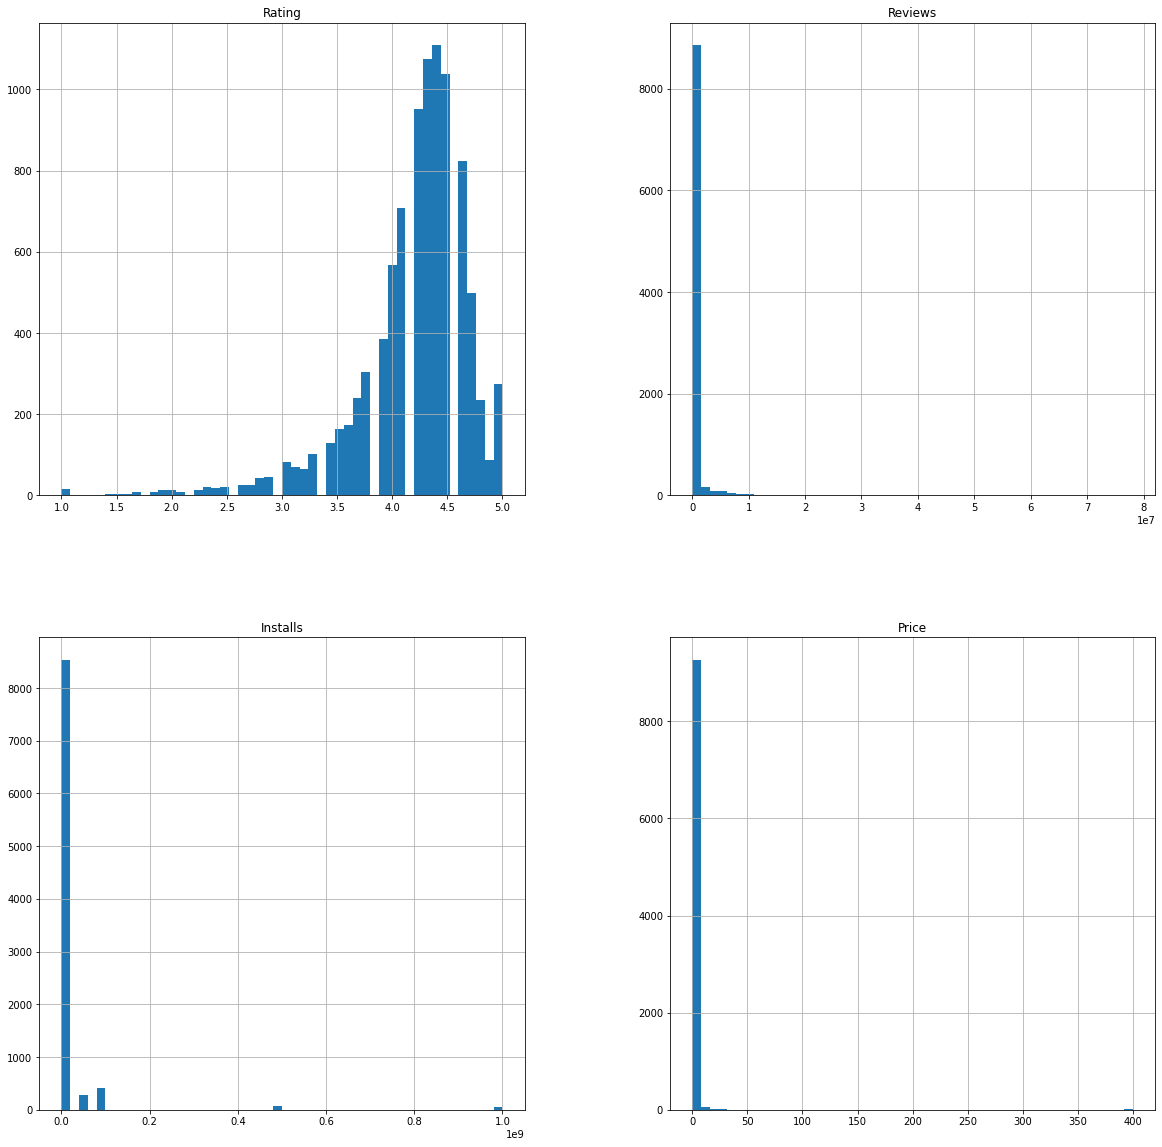

In [23]:
pd.DataFrame.hist(df, figsize=(20,20), bins=50);

c:\program files (x86)\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


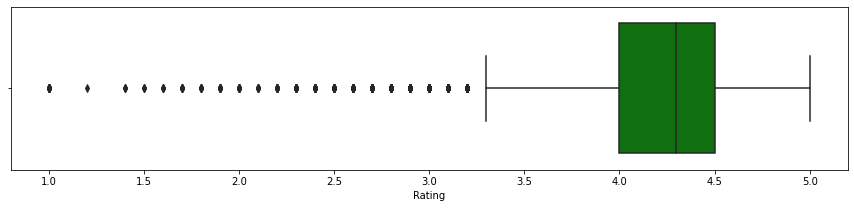

In [24]:
plt.subplots(figsize=(15,3))
sns.boxplot(df['Rating'], color='green');

c:\program files (x86)\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


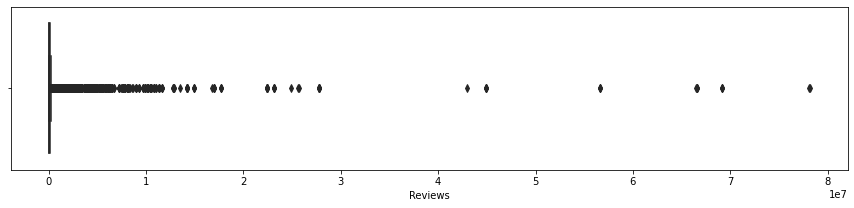

In [25]:
plt.subplots(figsize=(15,3))
sns.boxplot(df['Reviews'], color='green');

c:\program files (x86)\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


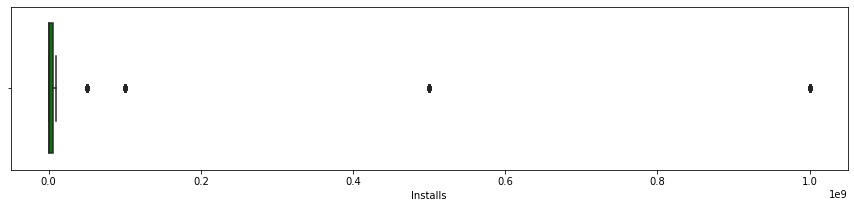

In [26]:
plt.subplots(figsize=(15,3))
sns.boxplot(df['Installs'], color='green');

c:\program files (x86)\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


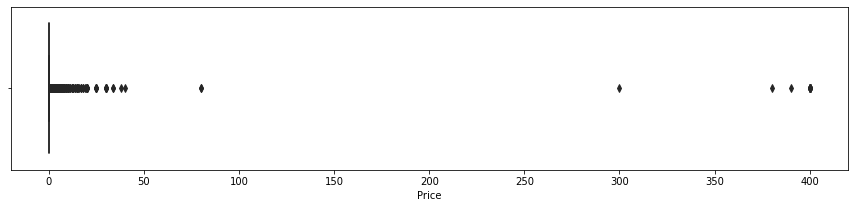

In [27]:
plt.subplots(figsize=(15,3))
sns.boxplot(df['Price'], color='green');

In [28]:
df.corr()

,Rating,Reviews,Installs,Price
Rating,1.000000,0.068141,0.051355,-0.021903
Reviews,0.068141,1.000000,0.641612,-0.009820
Installs,0.051355,0.641612,1.000000,-0.011890
Price,-0.021903,-0.009820,-0.011890,1.000000


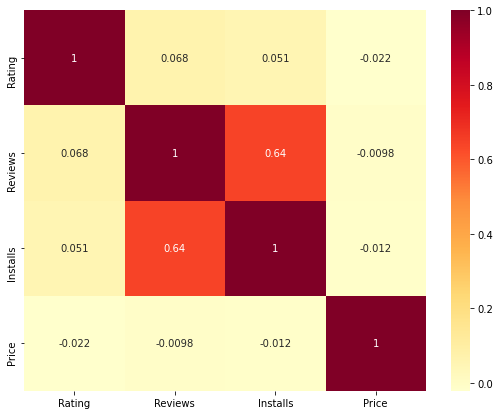

In [29]:
plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd');

In [30]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [34]:
df2 = df[['Rating', 'Reviews', 'Installs', 'Price']]
df2 = df2.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df2)
df2 = pd.DataFrame(x_scaled)
df2.describe()

,0,1,2,3
count,9366.000000,9366.000000,9366.000000,9366.000000
mean,0.797939,0.006577,0.017897,0.002402
std,0.128805,0.040227,0.091238,0.039541
min,0.000000,0.000000,0.000000,0.000000
25%,0.750000,0.000002,0.000010,0.000000
50%,0.825000,0.000076,0.000500,0.000000
75%,0.875000,0.001043,0.005000,0.000000
max,1.000000,1.000000,1.000000,1.000000


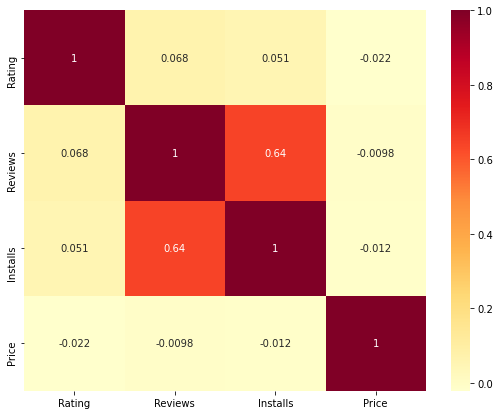

In [36]:
plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd');

c:\program files (x86)\python37-32\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


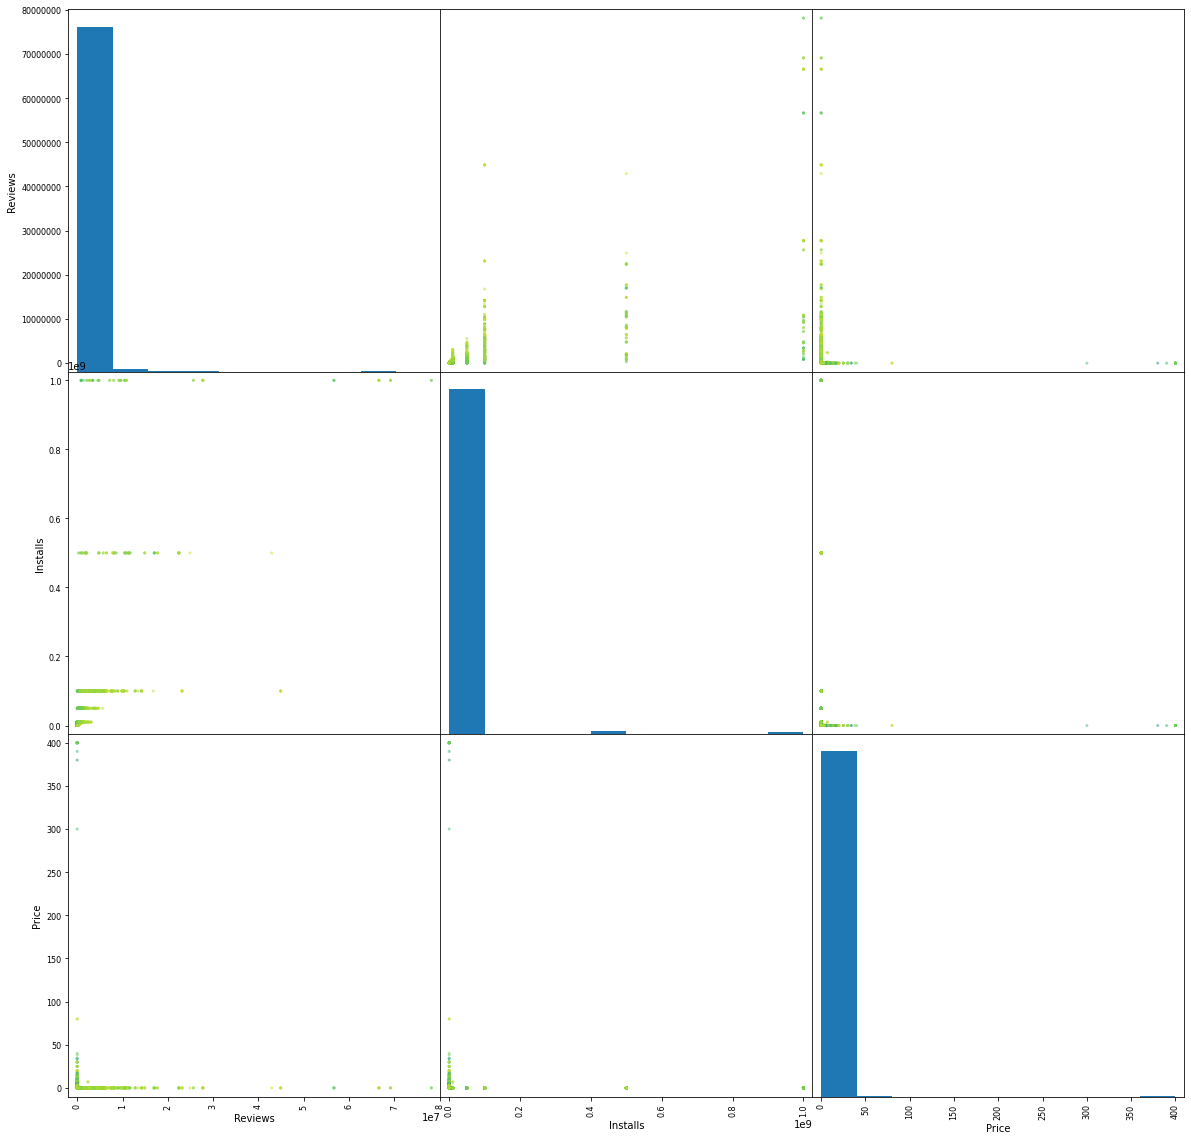

In [38]:
# dependiendo de la cantidad de registros, esta función puede tomar unos segundos en ejecutar
pd.plotting.scatter_matrix(df.drop('Rating',axis=1), 
                           c=df['Rating'], figsize=(20,20));